<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Regresión Lineal
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 23 de septiembre 2024 <br>

* * *

<br>
<br>

# Regresión Lineal

En esta actividad realizaras lo siguiente:

**Creación de variables**

* importar datos (variable exógena, X a la respuesta Y)
* variables de estacionales
* tendencia
* variables de atípicos
* variables rezagos

**Aplicación de regresión lineal múltiple**

**Evaluación de resultados y errores**

**Selección de variables**


> The forecast variable y is sometimes also called the regressand, dependent or explained variable. The predictor variables x are sometimes also called the regressors, independent or explanatory variables.


## Variables X

### Importar datos

Importa la serie de tiempo que escogiste anteriormente para usar como variable que explica a tu variable objetivo.

En el ejemplo de las remeses
- mi variable objetivo son las remeses recibidas cada mes
- mi variable exógena es el tipo de cambio

In [344]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp
import yfinance as yf

In [346]:
data = pd.read_excel("/content/drive/MyDrive/series_tiempo/Assets/remesas banxico.xlsx")
data.index = pd.to_datetime(data['Fecha'])
del data['Fecha']
data = pd.Series(data = data.Value, index=data.index)

In [347]:
stock = 'MXN=X'
ticker = yf.Ticker(stock)
usdmxn = ticker.history(start= '1993-01-01', end= '2023-12-31', interval='1mo')['Close']

usdmxn.head()

,Close
Date,
2003-12-01 00:00:00+00:00,11.191
2004-01-01 00:00:00+00:00,11.048
2004-02-01 00:00:00+00:00,11.055
2004-03-01 00:00:00+00:00,11.105
2004-04-01 00:00:00+01:00,11.352


- Ajusta la serie de tiempo para que las fechas sean las mismas.
- Ajusta el formato de la fecha.

In [348]:
data = data["2003":]

In [349]:
 usdmxn = usdmxn["2004":]

In [350]:
usdmxn.index = usdmxn.index.strftime('%Y-%m')
usdmxn.index = pd.to_datetime(usdmxn.index)
usdmxn.head()

,Close
Date,
2004-01-01,11.048
2004-02-01,11.055
2004-03-01,11.105
2004-04-01,11.352
2004-05-01,11.427


### Variables estacionales

En una regresión lineal cómun $$ y =  \beta_1x +  \beta_0 $$

perdemos información relacionada a la estacionalidad, en este caso los meses. Para incluir los meses Enero, Febrero, Marzo, etc. agregamos variable binarias, de tal forma que la ecuación sea $$ y =  \beta_0 +  \beta_{1}x_{enero},  \beta_{2}x_{febrero} +  \beta_{3}x_{marzo}  \dots $$



In [351]:
data = pd.DataFrame(data.values, columns=['Y'], index=data.index)
data.head()

,Y
Fecha,
2003-01-01,1051.2547
2003-02-01,979.7597
2003-03-01,1139.1124
2003-04-01,1202.5097
2003-05-01,1350.9669


In [352]:
data = data.join(usdmxn)

In [353]:
getattr(data.index, 'month_name')

<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Fecha', length=252, freq=None)>

In [354]:
data['mes'] = data.index.month_name()

In [355]:
data

,Y,Close,mes
Fecha,,,
2003-01-01,1051.2547,NaN,January
2003-02-01,979.7597,NaN,February
2003-03-01,1139.1124,NaN,March
2003-04-01,1202.5097,NaN,April
2003-05-01,1350.9669,NaN,May
...,...,...,...
2023-08-01,5568.2127,16.757130,August
2023-09-01,5616.6566,17.403900,September
2023-10-01,5817.8272,18.048100,October


In [356]:
data = pd.get_dummies(data, columns=['mes'], prefix="", prefix_sep="", drop_first=True, dtype=float)

In [357]:
data

,Y,Close,August,December,February,January,July,June,March,May,November,October,September
Fecha,,,,,,,,,,,,,
2003-01-01,1051.2547,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-02-01,979.7597,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-03-01,1139.1124,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2003-04-01,1202.5097,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-05-01,1350.9669,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,5568.2127,16.757130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-09-01,5616.6566,17.403900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-10-01,5817.8272,18.048100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Atípicos

De la sesión anterior, utiliza los valores atípicos que encontraste en tu varible. Deben ser una tupla fecha - 1

In [358]:
fecha_2008 = pd.Series(data = [1], index=pd.to_datetime(["2008-11-01"]), name='2008_outlier')
fecha_2020 = pd.Series(data = [1], index=pd.to_datetime(["2020-03-01"]), name='2020_outlier')

In [359]:
fecha_2008

,2008_outlier
2008-11-01,1


In [360]:
data = data.join(fecha_2008).fillna(0)

In [361]:
data["2008":"2008"]

,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2008_outlier
Fecha,,,,,,,,,,,,,,
2008-01-01,1781.6996,10.8126,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-02-01,1942.0303,10.7220,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-03-01,2206.3771,10.6355,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2008-04-01,2278.0890,10.4895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-05-01,2477.9622,10.3260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2008-06-01,2366.0060,10.2990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-07-01,2278.9294,10.0301,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,2198.5254,10.2742,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-01,2208.0883,10.9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [362]:
data = data.join(fecha_2020).fillna(0)

In [363]:
data["2020":"2020"]

,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2008_outlier,2020_outlier
Fecha,,,,,,,,,,,,,,,
2020-01-01,2676.6263,18.780800,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,2803.4988,19.605101,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,4147.1146,23.833000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-04-01,2982.6531,23.742001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-01,3541.8263,22.152100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-06-01,3630.6225,23.056570,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-01,3629.1537,21.995399,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-01,3654.1707,21.749901,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,3673.8419,22.373501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Lags

En clases pasadas analizamos la autocorrelación, la cuál nos dice que valores pasados son representativos para el valor actual. Considerando eso y la estacionalidad mensual, puedes crear una 12 variable de rezagos.

$$ y =  \beta_0 +  \beta_{1}x_{mespasado},  \beta_{2}x_{2mesesatras} +  \beta_{3}x_{3mesesatras}  \dots $$

In [364]:
data['lag1'] = data['Y'].shift(1)
data['lag2'] = data['Y'].shift(2)
data['lag3'] = data['Y'].shift(3)
data['lag4'] = data['Y'].shift(4)
data['lag5'] = data['Y'].shift(5)
data['lag6'] = data['Y'].shift(6)
data['lag7'] = data['Y'].shift(7)
data['lag8'] = data['Y'].shift(8)
data['lag9'] = data['Y'].shift(9)
data['lag10'] = data['Y'].shift(10)
data['lag11'] = data['Y'].shift(11)
data['lag12'] = data['Y'].shift(12)

In [365]:
data.head(13)

,Y,Close,August,December,February,January,July,June,March,May,...,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
Fecha,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1051.2547,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-01,979.7597,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-01,1139.1124,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-01,1202.5097,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1051.2547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01,1350.9669,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,979.7597,1051.2547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-06-01,1351.1707,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1139.1124,979.7597,1051.2547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-01,1361.3620,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1202.5097,1139.1124,979.7597,1051.2547,NaN,NaN,NaN,NaN,NaN,NaN
2003-08-01,1401.2462,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1350.9669,1202.5097,1139.1124,979.7597,1051.2547,NaN,NaN,NaN,NaN,NaN
2003-09-01,1365.5085,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1351.1707,1350.9669,1202.5097,1139.1124,979.7597,1051.2547,NaN,NaN,NaN,NaN


In [366]:
data = data["2004":]

## Aplica el modelo de regresión

In [367]:
import statsmodels.api as sm

In [368]:
print(sm.OLS(data['Y'], data.drop(columns=['Y'])).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              3027.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                   2.12e-259
Time:                        23:51:21   Log-Likelihood:                         -1539.6
No. Observations:                 240   AIC:                                      3131.
Df Residuals:                     214   BIC:                                      3222.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

> he Durbin-Watson statistic will always have a value ranging between 0 and 4. A value of 2.0 indicates there is no autocorrelation detected in the sample. Values from 0 to less than 2 point to positive autocorrelation, and values from 2 to 4 mean negative autocorrelation.

> In statistics, the Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.

In [369]:
from sklearn.linear_model import LinearRegression

In [370]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])

0.9816375766129567

In [371]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).coef_

array([ 5.01795655e+00, -6.06020084e+01, -1.05295562e+02, -1.26305552e+02,
       -3.69000897e+02, -8.38730553e+01, -2.48932757e+01,  2.18118618e+02,
        1.89872443e+02, -2.42292265e+02, -5.01428283e+01, -2.13805677e+02,
       -4.95880996e+02,  8.58804575e+02,  5.01412584e-01,  1.73858306e-01,
        1.21665255e-01, -2.14324310e-02,  1.11679383e-01,  2.30359799e-03,
        1.72322860e-02, -1.13557157e-01,  1.31537050e-01, -4.58052639e-02,
       -5.46967463e-02,  1.98859432e-01])

In [372]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).intercept_

-8.575580373586035

In [373]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).feature_names_in_

array(['Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2008_outlier', '2020_outlier', 'lag1', 'lag2', 'lag3', 'lag4',
       'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'],
      dtype=object)

In [374]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).n_features_in_

26

In [375]:
errors = LinearRegression().fit(data.drop(columns=['Y']), data['Y']).predict(data.drop(columns=['Y'])) - data['Y']

In [376]:
errors.head()

,Y
Fecha,
2004-01-01,-91.365270
2004-02-01,-78.026419
2004-03-01,2.685067
2004-04-01,-131.859875
2004-05-01,-57.982246


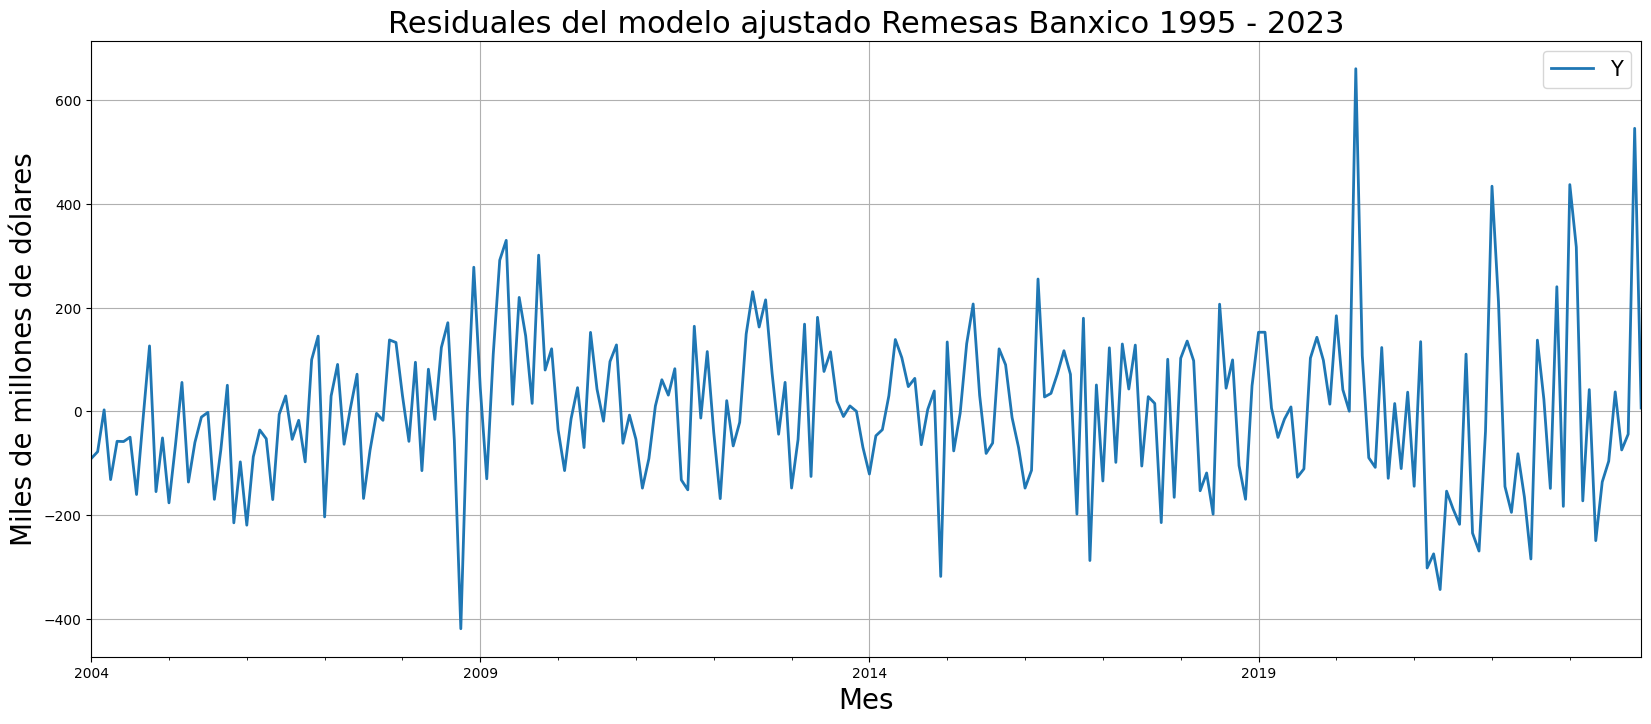

In [377]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado Remesas Banxico 1995 - 2023', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [378]:
errors.mean()

1.7810937909719844e-13

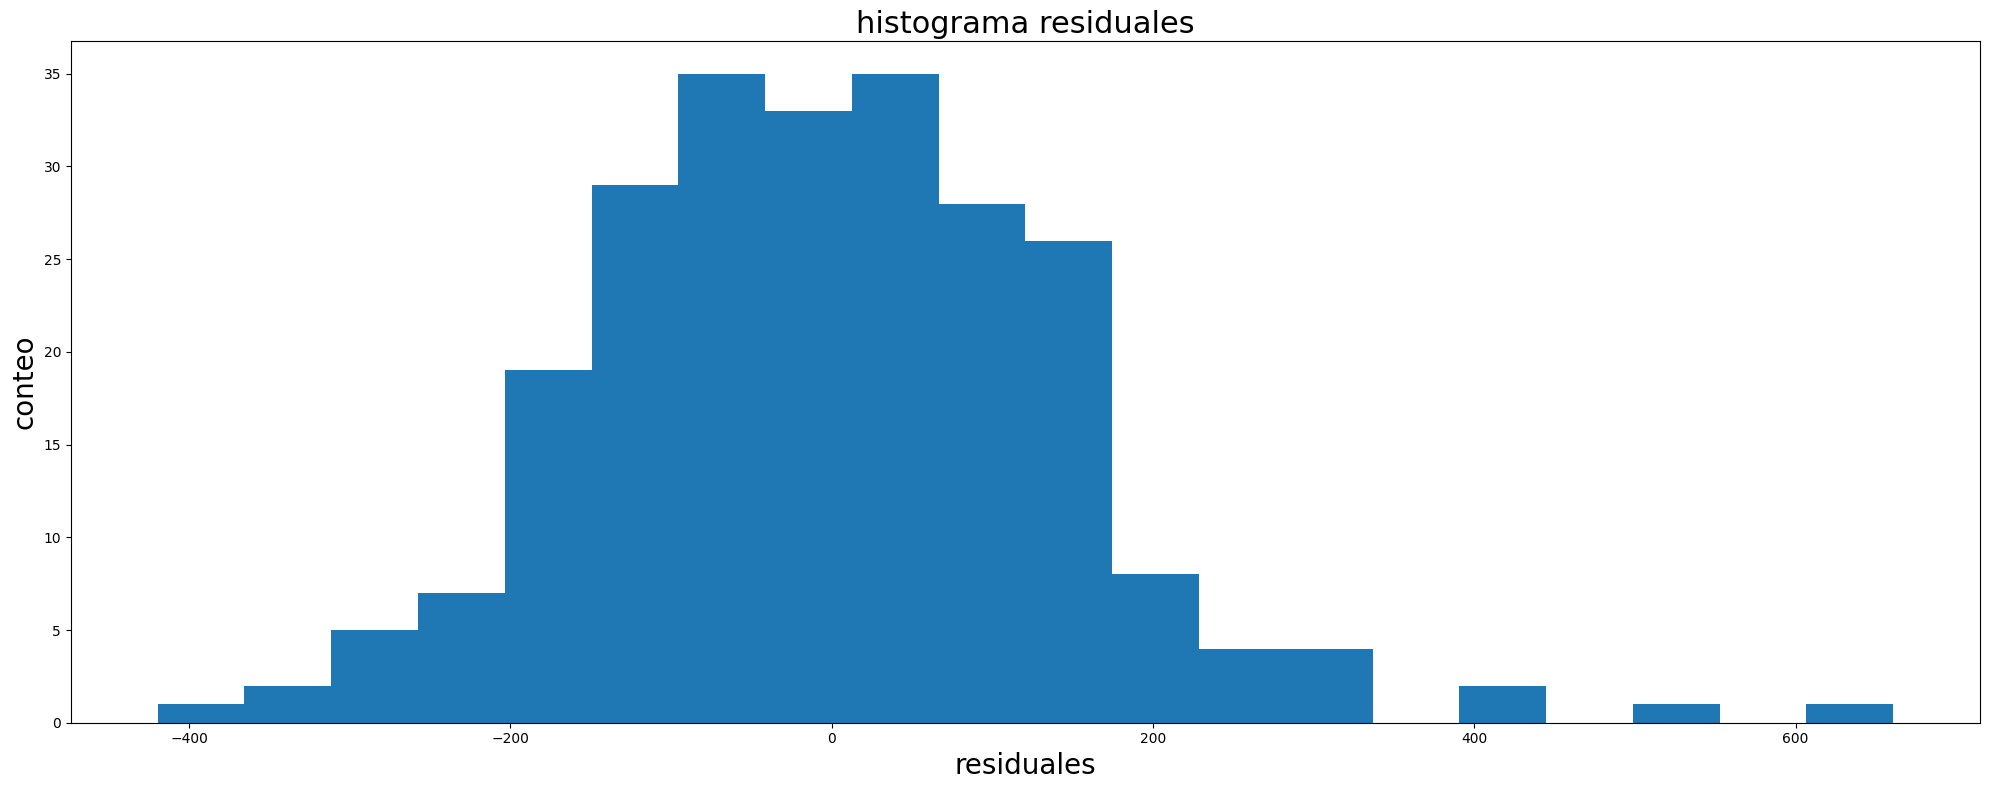

In [379]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(errors, bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

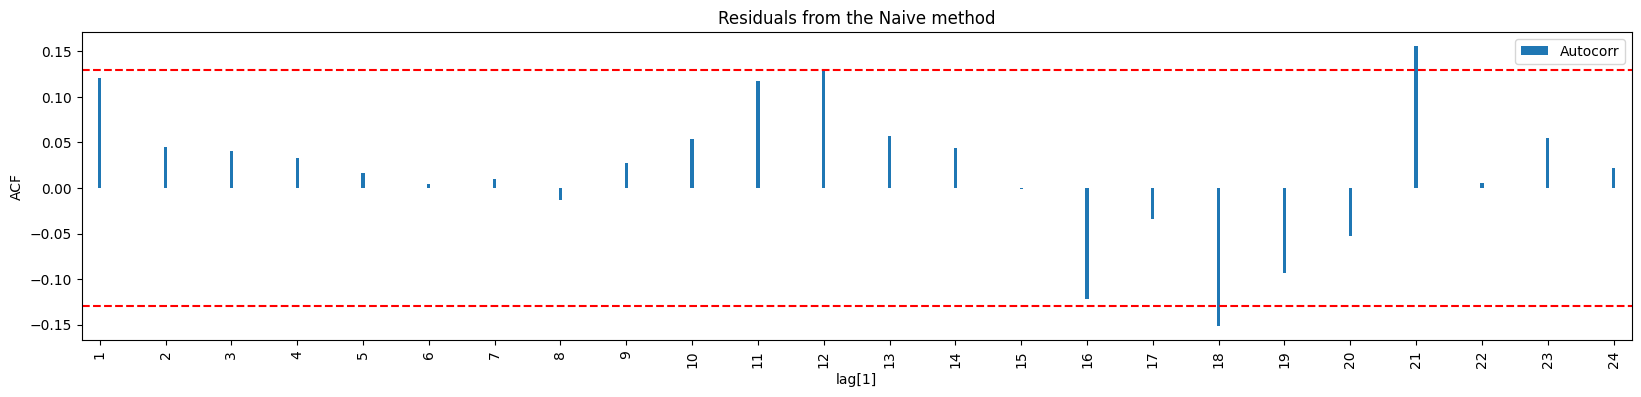

In [380]:
import math

ticker_data = errors
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(errors)
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")